# <font color='blue'>Data Science Academy Big Data Real-Time Analytics com Python e Spark</font>

# <font color='blue'>Projeto 1</font>

#### Estou fazendo o curso Big Data Real-Time Analytics com Python e Spark na Data Science Academy, no capitulo 3 foi apresnetado um projeto de reconhecimento facial em imagens.

#### Com base nesse projeto e com a ajuda do post https://www.pyimagesearch.com/2016/06/20/detecting-cats-in-images-with-opencv/, criei o meu projeto de reconhecimento de gatos. Esss trabalho foi feito no windows alguns caminhos podem não funcionar no MAC ou Linux    

#### Inportando as bibiliotecas

In [9]:
# Instalar o OpenCV no windows
#!pip install opencv-python

# Manipulação dos sistema operacional
import os

# Importa o modulo do opencv
import cv2

# Impontando modulo para tratar o tamanho da imagem
from PIL import Image as img

# Biblioteca para graficos,  usarei para plotar as imagens lado a lado
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

In [10]:
def RedimensionalizarImagem(file_name, tamanho, caminho):
    
    largura_desejada = int(tamanho)
    imagem = img.open(file_name)

    largura_imagem = imagem.size[0]
    altura_imagem = imagem.size[1]
    
    percentual_largura = float(largura_desejada) / float(largura_imagem)
    altura_desejada = int((altura_imagem * percentual_largura))  
    
    #altura_desejada = int(533)
    imagem = imagem.resize((largura_desejada, altura_desejada), img.ANTIALIAS)        
    
    imagem.save(caminho + name)    
    
    return imagem

#### Busquei na internet varias imagens de gatos e as coloquei na pasta download.
#### Padronizei as imagens com 200 de largura e proporcionei a altura na pasta imagens_tratadas 

In [11]:
# tamanho da imagens
tamanho = 200

#vetor de imagens
image_datas = []

# Caminho das imagens selecionadas
origem = os.getcwd() + '/downloads/'

# Caminho das imagens tratadas
destino = os.getcwd() + '/imagens_tratadas/'

# Varre toda a pasta downloads e salva a na pasta fotos_tratadas com o tamanho escolhido
for name in os.listdir(origem):  

    fileImage = origem + name

    # Salva a imagem e retorna a mesma ja redimenzionalizada
    image_datas.append(RedimensionalizarImagem(fileImage, tamanho, destino))

#### Vamos vizualizar as imagens

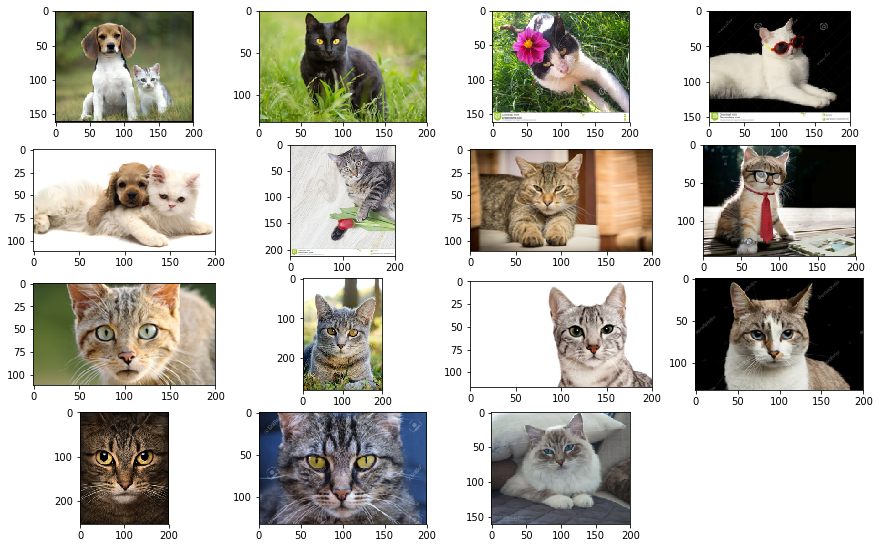

In [12]:
# define um tamanho para as imagens
fig = plt.figure(figsize=(15,15))

for i, img in enumerate(image_datas):
    
    # Quatro linhas com 4 colunas
    ax = fig.add_subplot(4,4, i+1)
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=0.6, wspace=None, hspace=None)
    
    ax.imshow(img)

In [13]:
arquivo_parametros = 'haarcascades\\haarcascade_frontalcatface.xml'

# Executando o classificador
classificador_cascade = cv2.CascadeClassifier(arquivo_parametros)

In [27]:
# Caminho das imagens tratadas
caminho = os.getcwd() + '/imagens_tratadas/'

# Caminho das imagens tratadas
resultado = os.getcwd() + '/imagens_resultado/'

# Varre toda a pasta downloads e salva a na pasta fotos_tratadas com o tamanho escolhido
for name in os.listdir(caminho):
    
    fileImage = caminho + name    
        
    # Leitura da imagem
    imagem = cv2.imread(fileImage)

    # Conversao da imagem em escala de cinza (grey)
    grayImage = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)       
    
    # Definicao dos parametros de classificacao
    faces = classificador_cascade.detectMultiScale(grayImage,  scaleFactor = 1.3, minNeighbors = 2, minSize = (15, 15))
    
    for (i, (x, y, w, h)) in enumerate(faces):

        cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(imagem, name, (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)
        
    # show the detected cat faces
    cv2.imwrite(resultado + name + '.jpg', imagem)
    cv2.waitKey(0)      

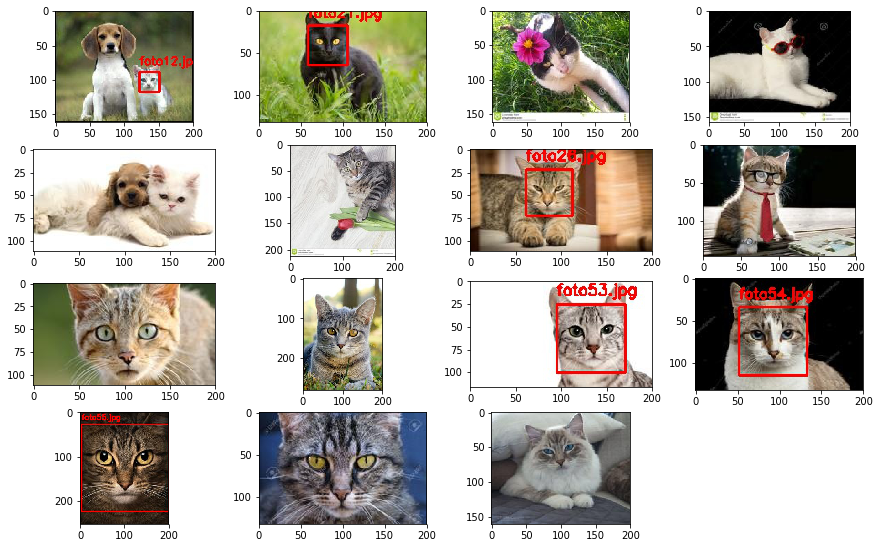

In [28]:
# Caminho das imagens tratadas
resultado = os.getcwd() + '/imagens_resultado/'

# define um tamanho para as imagens
fig = plt.figure(figsize=(15,15))

for i, name in enumerate(os.listdir(resultado)):  

    fileImage = resultado + name
   
    image = mpimg.imread(fileImage)  
    
    # Quatro linhas com 4 colunas
    ax = fig.add_subplot(4,4, i+1)
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=0.6, wspace=None, hspace=None)
    
    ax.imshow(image)

In [16]:
#### Conclusão 

#### links uteis

#### https://www.lfd.uci.edu/~gohlke/pythonlibs/#opencv
#### https://www.datascienceacademy.com.br
#### https://www.pyimagesearch.com/2016/06/20/detecting-cats-in-images-with-opencv/
#### https://github.com/opencv/opencv
#### https://gist.github.com/macndesign/4381562    